## Imoprt Libraries

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

## Data Loading

In [4]:
data_dir=r"Data"
Eye=[]
for file in os.listdir(data_dir):
    Eye+=[file]
print(Eye)
print(len(Eye))

['Cyst', 'Normal', 'Stone', 'Tumor']
4


## Data Preprocessing

In [5]:
img_height,img_width=256,256
batch_size=20

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 8714 images belonging to 4 classes.
Found 3732 images belonging to 4 classes.


In [8]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model4 = Sequential()
model4.add(base_model)
model4.add(GlobalAveragePooling2D())
model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(4, activation='sigmoid'))
model4.summary()


model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history4=model4.fit(train_generator,
                  
                  epochs=10,
                  verbose=1,
                  validation_data=test_generator)

model4.save(r"models/vgg.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                

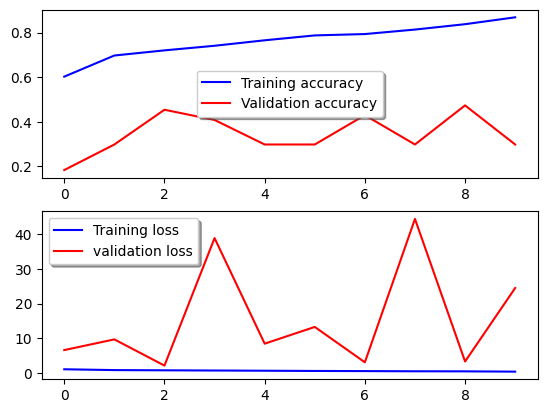

In [10]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history4.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(history4.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history4.history['loss'], color='b', label="Training loss")
ax[1].plot(history4.history['val_loss'], color='r', label="validation loss")
legend = ax[1].legend(loc='best', shadow=True)

In [11]:
model4.evaluate(test_generator)
model4.save("models/VGG16.h5")

187/187 [==============================] - 714s 4s/step - loss: 24.5173 - accuracy: 0.2980


## Applying CNN Algorithm

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 96)       0

In [6]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit_generator(train_generator,epochs=10,validation_data=test_generator,verbose=1)

C:\Users\ymts0427\AppData\Local\Temp\ipykernel_3036\1616187481.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_generator,epochs=10,validation_data=test_generator,verbose=1)


Epoch 1/10
436/436 [==============================] - 472s 1s/step - loss: 0.1919 - accuracy: 0.9305 - val_loss: 5.5301 - val_accuracy: 0.3934
Epoch 2/10
436/436 [==============================] - 459s 1s/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 7.5632 - val_accuracy: 0.4443
Epoch 3/10
436/436 [==============================] - 461s 1s/step - loss: 1.7115e-05 - accuracy: 1.0000 - val_loss: 8.1775 - val_accuracy: 0.4440
Epoch 4/10
436/436 [==============================] - 458s 1s/step - loss: 8.1098e-06 - accuracy: 1.0000 - val_loss: 8.5771 - val_accuracy: 0.4451
Epoch 5/10
436/436 [==============================] - 458s 1s/step - loss: 4.7236e-06 - accuracy: 1.0000 - val_loss: 8.8775 - val_accuracy: 0.4453
Epoch 6/10
436/436 [==============================] - 500s 1s/step - loss: 3.0109e-06 - accuracy: 1.0000 - val_loss: 9.1495 - val_accuracy: 0.4456
Epoch 7/10
436/436 [==============================] - 526s 1s/step - loss: 2.0408e-06 - accuracy: 1.0000 - val_loss: 9.4013 - 

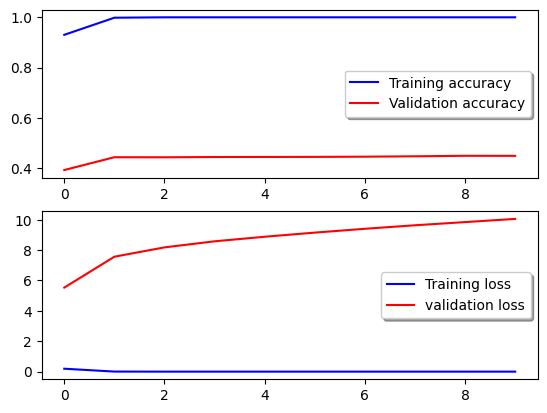

In [7]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [8]:
model.evaluate(test_generator)
model.save("models/CNN.h5")

187/187 [==============================] - 53s 284ms/step - loss: 10.0511 - accuracy: 0.4496


In [14]:
base_model2 = tf.keras.applications.ResNet50(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model11 = Sequential()
model11.add(base_model2)
model11.add(GlobalAveragePooling2D())
model11.add(Dense(32, activation='relu'))
model11.add(BatchNormalization())
model11.add(Dropout(0.2))
model11.add(Dense(4, activation='softmax'))
model11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 32)                65568     
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 4)                

In [16]:
model11.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model11.fit(train_generator,epochs=10,validation_data=test_generator,verbose=1)

Epoch 1/10
436/436 [==============================] - 4661s 11s/step - loss: 0.2731 - accuracy: 0.9100 - val_loss: 3.3407 - val_accuracy: 0.2980
Epoch 2/10
436/436 [==============================] - 4333s 10s/step - loss: 0.0815 - accuracy: 0.9775 - val_loss: 3.7799 - val_accuracy: 0.3108
Epoch 3/10
436/436 [==============================] - 4325s 10s/step - loss: 0.0319 - accuracy: 0.9913 - val_loss: 2.6127 - val_accuracy: 0.4767
Epoch 4/10
436/436 [==============================] - 4324s 10s/step - loss: 0.0440 - accuracy: 0.9874 - val_loss: 1.8278 - val_accuracy: 0.6158
Epoch 5/10
436/436 [==============================] - 47778s 110s/step - loss: 0.0410 - accuracy: 0.9877 - val_loss: 1.3462 - val_accuracy: 0.6744
Epoch 6/10
436/436 [==============================] - 4566s 10s/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 3.3923 - val_accuracy: 0.3156
Epoch 7/10
436/436 [==============================] - 4560s 10s/step - loss: 0.0419 - accuracy: 0.9880 - val_loss: 1.3667 - val_

In [17]:
model11.evaluate(test_generator)
model11.save("models/ResNet50.h5")

187/187 [==============================] - 392s 2s/step - loss: 1.3714 - accuracy: 0.6809


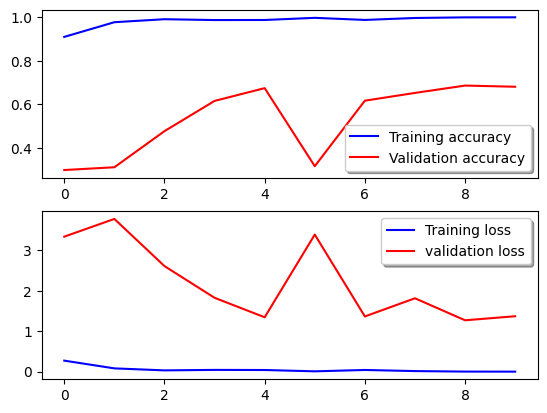

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss")
legend = ax[1].legend(loc='best', shadow=True)

## Applying MobileNet Algorithm

In [9]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(4, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

In [10]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model1.fit_generator(train_generator,epochs=15,validation_data=test_generator,verbose=1)

Epoch 1/15


C:\Users\ymts0427\AppData\Local\Temp\ipykernel_3036\1647594366.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist1=model1.fit_generator(train_generator,epochs=15,validation_data=test_generator,verbose=1)


436/436 [==============================] - 1228s 3s/step - loss: 0.1332 - accuracy: 0.9547 - val_loss: 1.3961 - val_accuracy: 0.6474
Epoch 2/15
436/436 [==============================] - 1199s 3s/step - loss: 0.0370 - accuracy: 0.9890 - val_loss: 2.0803 - val_accuracy: 0.6391
Epoch 3/15
436/436 [==============================] - 1333s 3s/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.5902 - val_accuracy: 0.8071
Epoch 4/15
436/436 [==============================] - 1329s 3s/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.8152 - val_accuracy: 0.7430
Epoch 5/15
436/436 [==============================] - 1274s 3s/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.6420 - val_accuracy: 0.8006
Epoch 6/15
436/436 [==============================] - 1252s 3s/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 1.6889 - val_accuracy: 0.6758
Epoch 7/15
436/436 [==============================] - 1188s 3s/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 1.0001 - val_accuracy: 0.7532
Epo

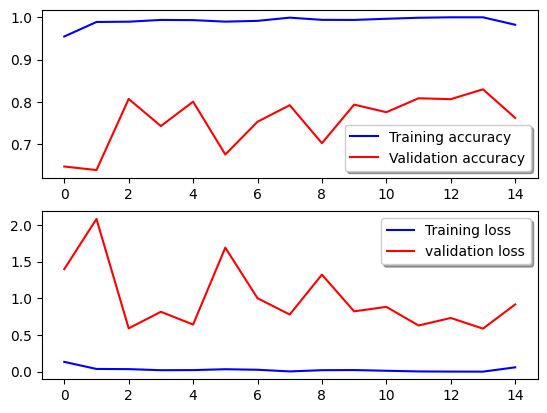

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
model1.evaluate(test_generator)
model1.save("models/MobileNet.h5")

187/187 [==============================] - 204s 1s/step - loss: 0.9155 - accuracy: 0.7623


## Clacate the Accurarcy

In [13]:
Accuracy = []

for i in [hist, hist1]:
    x = i.history.get('accuracy')[-1]
    Accuracy.append(x)

Accuracy

[1.0, 0.9824420213699341]

## Classification Output

1/1 [==============================] - 0s 330ms/step
[0.2572658  0.00133367 0.9999328  0.14687052]


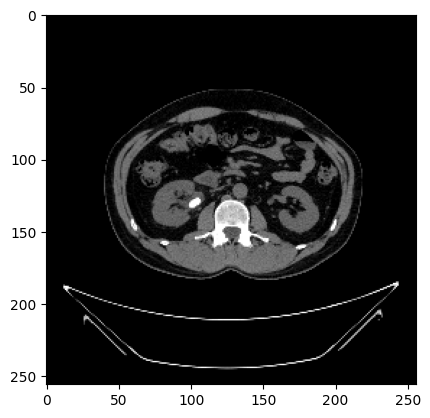

Prediction: Stone


In [16]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'Data\Stone\Stone- (7).jpg', grayscale=False, target_size=(256,256))
show_img=image.load_img(r'Data\Stone\Stone- (7).jpg', grayscale=False, target_size=(256, 256))
Eye = Eye
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',Eye[ind])